# PRCP-1006-Home Loan Default Prediction


Create a predictive model  to  identify the factors / customer segments that are eligible for taking loan.

In [1]:
import numpy as np
import pandas as pd 
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#to view all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Loading the data

In [3]:
df_app = pd.read_csv("application_train.csv") #application train
df_bur = pd.read_csv("bureau.csv")            #Bureau
df_bub = pd.read_csv("bureau_balance.csv")    #Bureau balance
df_ccb = pd.read_csv("credit_card_balance.csv") #Credit_card_balance
df_inp = pd.read_csv("installments_payments.csv") #Installment payment
df_pos = pd.read_csv("POS_CASH_balance.csv")      #POS_cash balance
df_pap = pd.read_csv("previous_application.csv")   #previuous application dataset

# Basic checks / Inspection

In [4]:
print('Application', df_app.shape)
print('Bureau', df_bur.shape)
print('Bureau_balance', df_bub.shape)
print('Credit card', df_ccb.shape)
print('Installment', df_inp.shape)
print('POS_Cash', df_pos.shape)
print('Previous_app', df_pap.shape)

Application (307511, 122)
Bureau (1716428, 17)
Bureau_balance (27299925, 3)
Credit card (3840312, 23)
Installment (13605401, 8)
POS_Cash (10001358, 8)
Previous_app (1670214, 37)


In [5]:
#Application dataset
df_app.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#df_app.isnull().sum()

In [7]:
#checking for duplicates in the unique identifer and whole dataset
print(df_app.duplicated().sum())
df_app['SK_ID_CURR'].duplicated().sum()

0


0

In [8]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

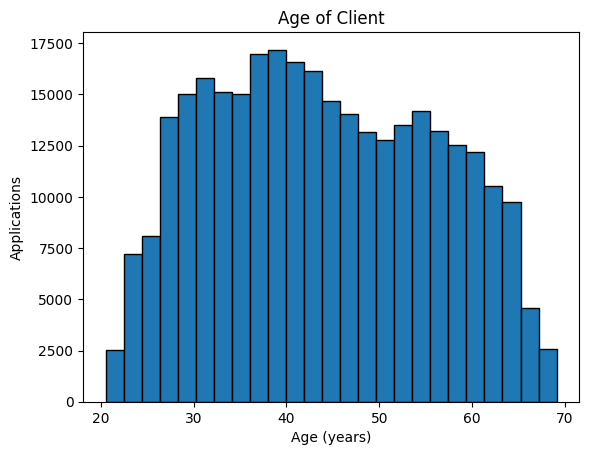

In [9]:
### Applicants Age ,days/number of days (365)
#Most applicants are between the age of 25 to 45 years
plt.hist(df_app['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.ylabel('Applications')
plt.title('Age of Client'); plt.xlabel('Age (years)');

# Defaulter's age

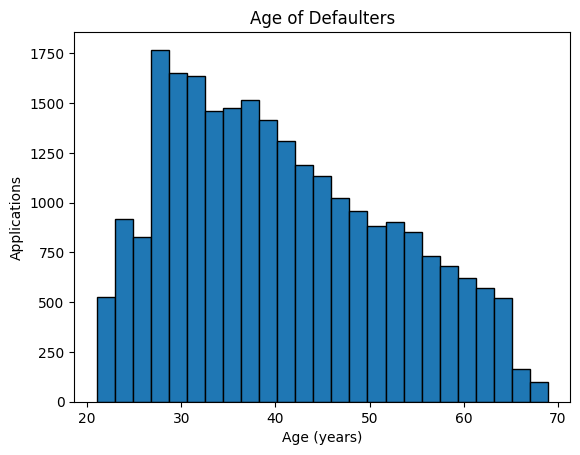

In [10]:
data = df_app
data1 = df_app[df_app['TARGET'] == 1]

plt.hist(data1['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.ylabel('Applications')
plt.title('Age of Defaulters'); plt.xlabel('Age (years)');

### Applicants occupations

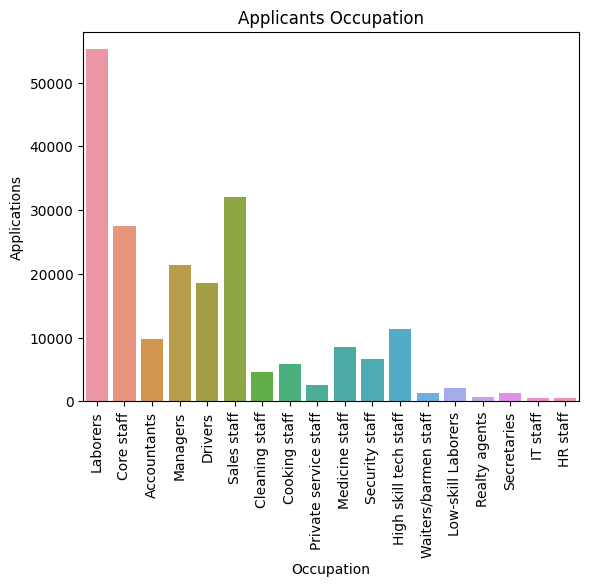

In [11]:
##All applicatns
sns.countplot(x='OCCUPATION_TYPE', data=df_app);
plt.title('Applicants Occupation');
plt.xlabel('Occupation')
plt.ylabel('Applications')
plt.xticks(rotation=90);

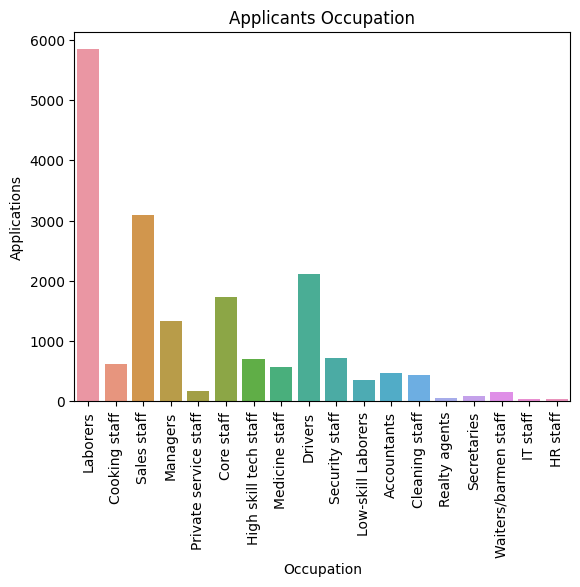

In [12]:
##Defaulter's Application
sns.countplot(x='OCCUPATION_TYPE', data=data1);
plt.title('Applicants Occupation');
plt.xlabel('Occupation')
plt.ylabel('Applications')
plt.xticks(rotation=90);

# Applicants gender

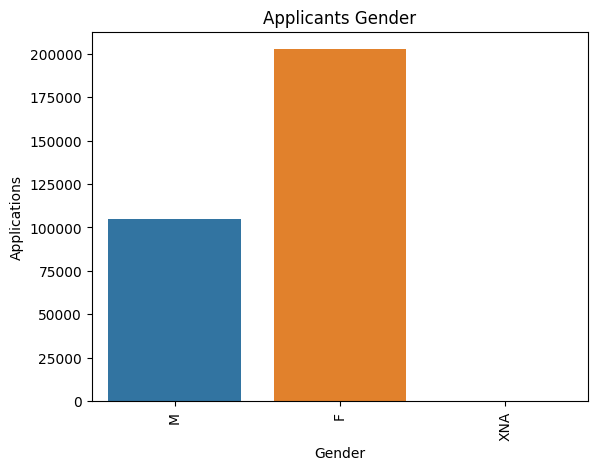

In [13]:
sns.countplot(x='CODE_GENDER', data=df_app);
plt.title('Applicants Gender');
plt.xlabel('Gender')
plt.ylabel('Applications')
plt.xticks(rotation=90);

# there is an extra category called XNA - since it is very low

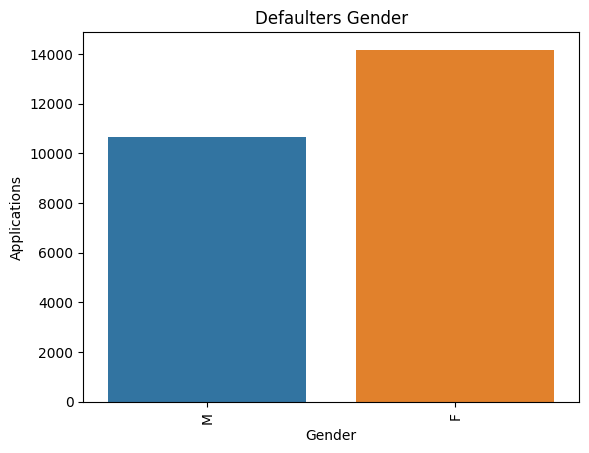

In [14]:
sns.countplot(x='CODE_GENDER', data=data1);
plt.title('Defaulters Gender');
plt.xlabel('Gender')
plt.ylabel('Applications')
plt.xticks(rotation=90);

# The number of defaulters male and female are almost same - 11k men and 14k women
# which is not as extreme as the difference in number of applications between male and female

### What is the education level of defaulters?

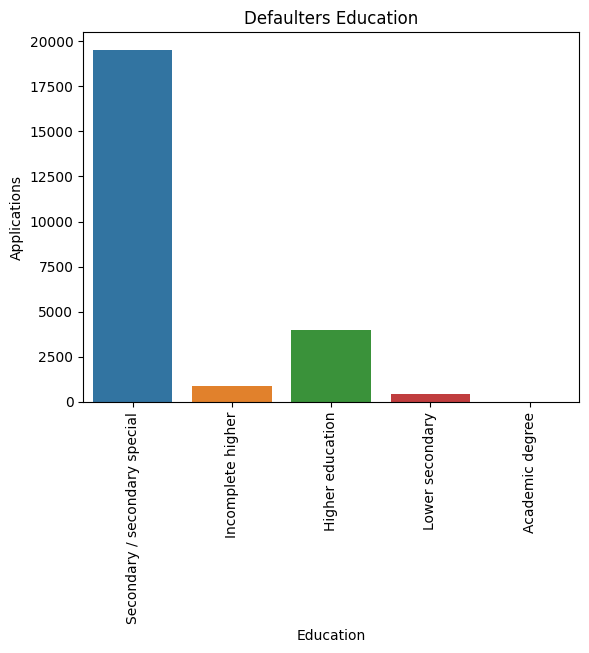

In [15]:
sns.countplot(x='NAME_EDUCATION_TYPE', data=data1);
plt.xlabel('Education')
plt.ylabel('Applications')
plt.title('Defaulters Education');
plt.xticks(rotation=90);

### What is the marital status of defaulters?

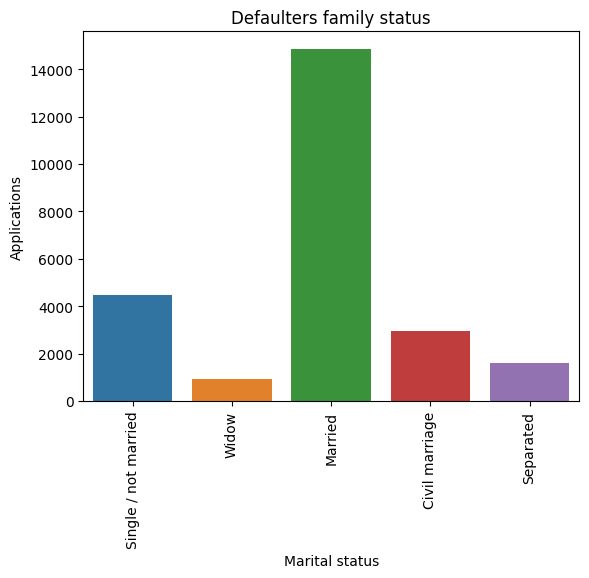

In [16]:
sns.countplot(x='NAME_FAMILY_STATUS', data=data1);
plt.title('Defaulters family status');
plt.xlabel('Marital status')
plt.ylabel('Applications')
plt.xticks(rotation=90);

# Married people make the most of the defaulters (probably due to the responsibilities attched to marriage)

# what kind of Housing do defaulters have?

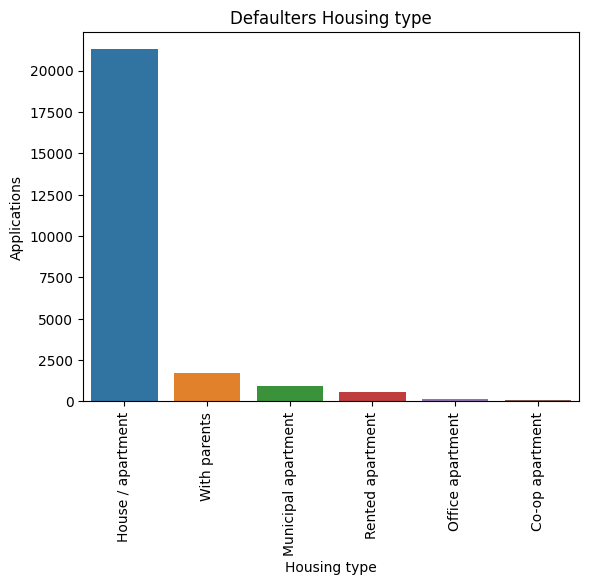

In [17]:
sns.countplot(x='NAME_HOUSING_TYPE', data=data1);
plt.xlabel('Housing type')
plt.ylabel('Applications')
plt.title('Defaulters Housing type');
plt.xticks(rotation=90);

# Do defaulters have many children?

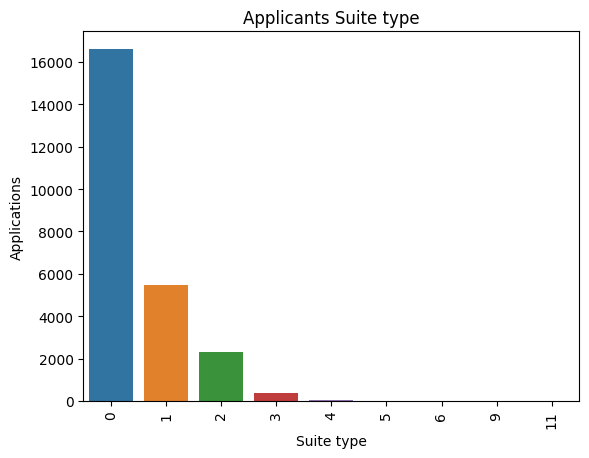

In [18]:
sns.countplot(x='CNT_CHILDREN', data=data1);
plt.xlabel('Suite type')
plt.ylabel('Applications')
plt.title('Applicants Suite type');
plt.xticks(rotation=90);

### Do defaulters own a car or a real estate?

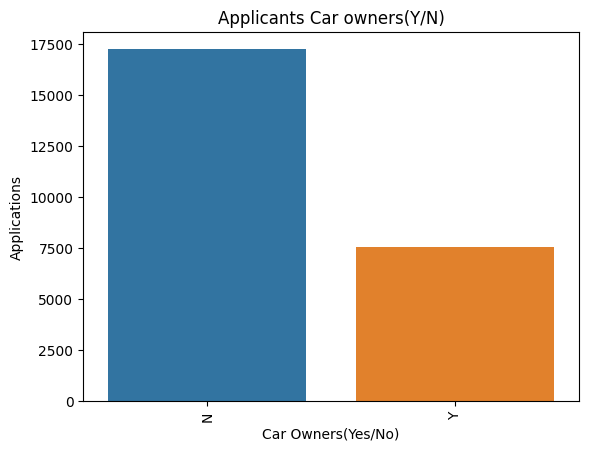

In [19]:
sns.countplot(x='FLAG_OWN_CAR', data=data1);
plt.xlabel('Car Owners(Yes/No)')
plt.ylabel('Applications')
plt.title('Applicants Car owners(Y/N)');
plt.xticks(rotation=90);

# Real estate owners or not?

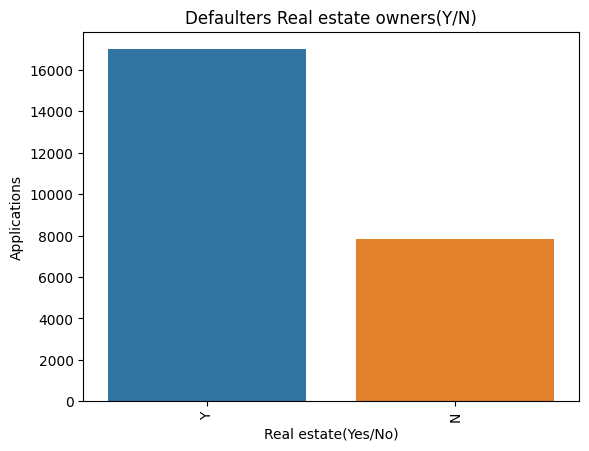

In [20]:
sns.countplot(x='FLAG_OWN_REALTY', data=data1);
plt.xlabel('Real estate(Yes/No)')
plt.ylabel('Applications')
plt.title('Defaulters Real estate owners(Y/N)');
plt.xticks(rotation=90);

## INFERENCE ##
# Many defaulters are real estate owners and cant repay loan

In [21]:
#df_app.describe()

In [22]:
#Bureau dataset
df_bur.head(2)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN


In [23]:
df_bub.head(2)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C


In [24]:
df_ccb.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.00,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.08,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0


In [25]:
df_inp.head(2)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525


In [26]:
df_pos.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0


In [27]:
df_pap.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


# Feature Engineering

# ##Dealing with missing values

In [28]:
##proportion of the missing values in each columns
Missing_Per = (df_app.isnull().sum()/df_app.isnull().count()*100).sort_values(ascending = False).round(2)
Missing_sum = df_app.isna().sum().sort_values(ascending = False)
missing_appl_train_data  = pd.concat([Missing_Per, Missing_sum], axis=1, keys=['Percent', "Train Missing Count"])
missing_appl_train_data.head(10)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


In [29]:
##create a dataframe to include only columns where the proportion of missing value is less than or equal to 30%
##And columns with more than 30% of the missings values are drop
##The column reduced to 72 from 122, meaning, 50 columns are droped
df1_train = df_app.loc[:, df_app.isnull().mean() <= .3]
df1_train.shape

(307511, 72)

In [30]:
##Checking the target variables

<Axes: xlabel='TARGET', ylabel='count'>

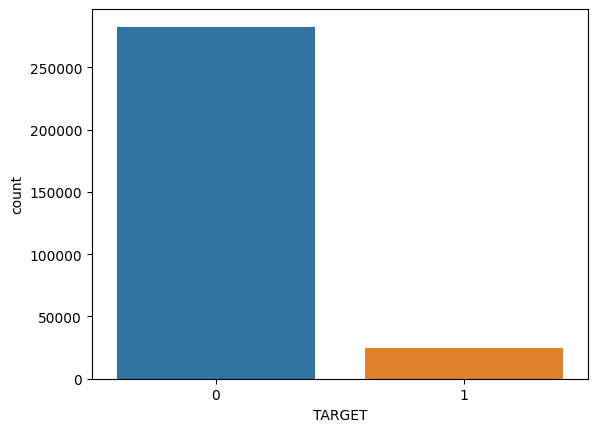

In [31]:
##Target varaibles
##Inbalace class for the target variables
sns.countplot(df_app['TARGET'])

# Correlation of the target variables

In [32]:
correlations = df_app.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


# Feature extraction

### Generic Feature Selection

In [33]:
#Defines a function called FeatureSelectionRF that performs feature selection using a Random Forest
#classifier to identify the most important features for predicting the target variable. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE

def FeatureSelectionRF(data):
    # separating features and the target
    y = data['TARGET']
    x = data.drop('TARGET', 1)

    y1 = y.copy()
    x1 = x.copy()

    # imputing missing values
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    x1 = pd.DataFrame(imp.fit_transform(x1))

    # Standardizing the features
    x1 = StandardScaler().fit_transform(x1)
    

    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
    sel.fit(x1, y1)
    selectedfeat= x.columns[(sel.get_support())]
    print(selectedfeat)
    print(len(selectedfeat))
    return selectedfeat


# Numerical - Using Random forest classifier

In [ ]:
# Implementing Random Forest for selecting the best features

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Calculate the repayment capacity of the applicant
df1_train['AMT_INCOME'] = df1_train['AMT_CREDIT']/ df1_train['AMT_INCOME_TOTAL']

# getting list of numeric column names
features_numeric = df1_train.select_dtypes([np.number]).columns

print(len(features_numeric))
df = df1_train[features_numeric]

#print(df.columns)

##62 features numeric features selected
print(df.shape)
#df.head(3)

In [35]:
## Feature selection using Random forest
##19 features selceted for based on the feature importance using random forest
selected_Nfeat=FeatureSelectionRF(df)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME'],
      dtype='object')
19


In [36]:
selected_Nfeat
Num_df = df1_train[selected_Nfeat]
print(Num_df.shape)
Num_df.head(3)

(307511, 19)


,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME
0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1.0,10,0.262949,0.139376,2.0,2.0,-1134.0,1.0,2.007889
1,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0,11,0.622246,NaN,1.0,1.0,-828.0,0.0,4.790750
2,100004,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0,9,0.555912,0.729567,0.0,0.0,-815.0,0.0,2.000000


# Categorical Clustering

In [37]:
#df1_train['NAME_INCOME_TYPE'].value_counts()

In [38]:
## Combine values of NAME_INCOME_TYPE
df1_train['NAME_INCOME_TYPE']=df1_train['NAME_INCOME_TYPE'].replace(['State servant','Maternity leave'],'Working').replace(['Commercial associate'],'Businessman').replace(['Pensioner','Student'],'Unemployed')
df1_train['NAME_INCOME_TYPE'].unique()

array(['Working', 'Businessman', 'Unemployed'], dtype=object)

In [39]:
#df1_train['NAME_FAMILY_STATUS'].unique()

In [40]:
## Combine values of NAME_INCOME_TYPE
print("Before change : ",df1_train['NAME_FAMILY_STATUS'].unique())
df1_train['NAME_FAMILY_STATUS']=df1_train['NAME_FAMILY_STATUS'].replace(['Civil marriage'],'Married').replace(['Widow','Separated'],'Single / not married')
print("After change : ",df1_train['NAME_FAMILY_STATUS'].unique())

Before change :  ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
After change :  ['Single / not married' 'Married' 'Unknown']


In [41]:
#Getting Categorical features
cat_fet=df1_train.select_dtypes(include=['object']).columns


cat_df = df1_train[cat_fet]

In [42]:
cat_df.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,Working,Higher education,Married,House / apartment,MONDAY,School


# Feature aggregators

### Impute feature

In [43]:
##Define a class to aggregate features in a DataFrame based on a specified grouping column.
#the class uses the driver_FeaturesAggregater function to create a pipeline for fitting a transformer (FeaturesAggregater)
#and transforming the data to produce an aggregated DataFrame based on specified features and grouping.

class featuresAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None,grpBy=None): 
        self.features = features
        self.grpByCol=grpBy
        self.agg_op_features = {} #initializing an empty dictionary named agg_op_features
        for f in features:
            self.agg_op_features[f] = features[f]

    def fit(self, X, y=None):
        print("GroupBy Column : ",self.grpByCol)
        print("Features :",self.features)
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(self.grpByCol).agg(self.agg_op_features)
        result.columns = ["_".join(x) for x in result.columns.ravel()]
        return result
    

from sklearn.pipeline import make_pipeline 
def driver_FeaturesAggregater(df, features,grpByCol):
    test_pipeline = make_pipeline(featuresAggregater(features,grpByCol))
    return(test_pipeline.fit_transform(df))

# Understanding clients relationship between the dataset

In [44]:
##clients record in both previous_app and current appl
len(np.intersect1d(df_app["SK_ID_CURR"], df_pap["SK_ID_CURR"]))

291057

In [45]:
##clients record in both current application and bureau
len(np.intersect1d(df_app["SK_ID_CURR"], df_bur["SK_ID_CURR"]))

263491

In [46]:
##The application dataset has no relationship with bureau balance, but can be link to bureau first and 
#then appln since, they have client unique identifier
##clients record in both bureau and bureau balance
len(np.intersect1d(df_bur["SK_ID_BUREAU"], df_bub["SK_ID_BUREAU"]))

774354

In [47]:
##clients record in both current application and POS_cash balance
len(np.intersect1d(df_app["SK_ID_CURR"], df_pos["SK_ID_CURR"]))

289444

In [48]:
##clients record in both current application and installation payment dataset
len(np.intersect1d(df_app["SK_ID_CURR"], df_inp["SK_ID_CURR"]))

291643

In [49]:
##clients record in both current application and credict card balance
len(np.intersect1d(df_app["SK_ID_CURR"], df_ccb["SK_ID_CURR"]))

86905

## Feature extraction and join

### Aggregate Bureau/Bureau balance and join Application

In [51]:
def Bureaujoin(BureauDf,BureauBalDf,AppSourceDf,output_filename):
  
  ### 1.1 Bureau Balance Agg
  groupByList=["SK_ID_BUREAU"]
  featureDict = {'MONTHS_BALANCE': ['min','max','mean'],'STATUS':['first']}
  bureauBalAggDf = driver_FeaturesAggregater(BureauBalDf,featureDict,groupByList)

  #print(sourceDf.head())
  #print(bureauBalAgg.head())

  ###1.2 Bureau Join Bureau_balance
  entireBureau=BureauDf.merge(bureauBalAggDf,on='SK_ID_BUREAU',how='left')

  ###1.3 Aggregate Bureau and Bureau_balance
  bureau=entireBureau
  ##Categorical feature conversions : 
  entireBureau['CREDIT_ACTIVE']=entireBureau['CREDIT_ACTIVE'].replace(['Active'],0).replace(['Bad debt'],1).replace(['Closed'],2).replace(['Sold'],3)

  num=entireBureau[[ 
        'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE','CREDIT_ACTIVE','DAYS_CREDIT_ENDDATE',
        'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
        'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
        'AMT_CREDIT_SUM_OVERDUE',  'DAYS_CREDIT_UPDATE',
        'AMT_ANNUITY', 'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max',
        'MONTHS_BALANCE_mean']]
  num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='mean')),
      ])


  entireBureaunumdf = pd.DataFrame(data=num_pipeline.fit_transform(num),columns=[ 
        'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE','CREDIT_ACTIVE', 'DAYS_CREDIT_ENDDATE',
        'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
        'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
        'AMT_CREDIT_SUM_OVERDUE',  'DAYS_CREDIT_UPDATE',
        'AMT_ANNUITY', 'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max',
        'MONTHS_BALANCE_mean'])

  entireBureauClean=pd.concat([entireBureau[['SK_ID_CURR','SK_ID_BUREAU']],entireBureaunumdf],axis=1)

  groupByList=["SK_ID_CURR"]
  featureDict = {'SK_ID_BUREAU': ['count'],'DAYS_CREDIT':['mean'],'CREDIT_DAY_OVERDUE':['mean']
  ,'CREDIT_ACTIVE':['mean']
  ,'DAYS_CREDIT_ENDDATE':['mean']
  ,'DAYS_ENDDATE_FACT':['mean']
  ,'AMT_CREDIT_MAX_OVERDUE':['mean']
  ,'CNT_CREDIT_PROLONG':['mean']
  ,'AMT_CREDIT_SUM':['mean']
  ,'AMT_CREDIT_SUM_DEBT':['mean']
  ,'AMT_CREDIT_SUM_LIMIT':['mean']
  ,'AMT_CREDIT_SUM_OVERDUE':['mean']
  ,'DAYS_CREDIT_UPDATE':['mean']
  ,'AMT_ANNUITY':['mean']
  ,'MONTHS_BALANCE_min':['mean']
  ,'MONTHS_BALANCE_max':['mean']
  ,'MONTHS_BALANCE_mean':['mean']}

  entireBureauAgg = driver_FeaturesAggregater(entireBureauClean,featureDict,groupByList)
  #print(entireBureauAgg[0:2])

  ### 1.4  Bureau join Application(Step1.pkl)

  #bureauBalAgg=
  step1Out=AppSourceDf.merge(entireBureauAgg,on='SK_ID_CURR',how='inner')
  # Save the DataFrame to a CSV file in the current directory
  step1Out.to_csv(output_filename, index=False)
  #step1.count()
 
    
  return step1Out
 

In [52]:
output_filename = "step1_out.csv"
Bureaujoin(df_bur,df_bub,df_app,output_filename)

GroupBy Column :  ['SK_ID_BUREAU']
Features : {'MONTHS_BALANCE': ['min', 'max', 'mean'], 'STATUS': ['first']}
GroupBy Column :  ['SK_ID_CURR']
Features : {'SK_ID_BUREAU': ['count'], 'DAYS_CREDIT': ['mean'], 'CREDIT_DAY_OVERDUE': ['mean'], 'CREDIT_ACTIVE': ['mean'], 'DAYS_CREDIT_ENDDATE': ['mean'], 'DAYS_ENDDATE_FACT': ['mean'], 'AMT_CREDIT_MAX_OVERDUE': ['mean'], 'CNT_CREDIT_PROLONG': ['mean'], 'AMT_CREDIT_SUM': ['mean'], 'AMT_CREDIT_SUM_DEBT': ['mean'], 'AMT_CREDIT_SUM_LIMIT': ['mean'], 'AMT_CREDIT_SUM_OVERDUE': ['mean'], 'DAYS_CREDIT_UPDATE': ['mean'], 'AMT_ANNUITY': ['mean'], 'MONTHS_BALANCE_min': ['mean'], 'MONTHS_BALANCE_max': ['mean'], 'MONTHS_BALANCE_mean': ['mean']}


### Joining POS_CASH_balance with Applications train

In [53]:
def PosCashJoin(PosCashDf,AppSourceDf,output_filename1):
  groupByList=["SK_ID_CURR"]
  featureDict = { 'MONTHS_BALANCE': ['min','max','mean'],'NAME_CONTRACT_STATUS':['count'], 'CNT_INSTALMENT' : ['min','max','mean'], 'CNT_INSTALMENT_FUTURE': ['min','max','mean']}
  posBal_Agg = driver_FeaturesAggregater(PosCashDf, featureDict, groupByList)

  #print(posBal_Agg.head())
  # pos_cash_balance join application train #### STEP-5 ####
  step2 = AppSourceDf.merge(posBal_Agg,on='SK_ID_CURR',how='inner')
  #step1.count()
   # Save the DataFrame to a CSV file in the current directory
  step2.to_csv(output_filename1, index=False)
  return  step2

In [54]:
#output_filename1 = "step2_out.csv"
#PosCashJoin(df_pos,df_app,output_filename1)

### Aggregate Installement  and App Join (Step3)

In [55]:
def InstallCashJoin(InstallCashDf,AppSourceDf,output_filename2):
  groupByListApp=["SK_ID_CURR"]
  #groupByListPrevApp=["SK_ID_PREV"]
  featureDict = {'DAYS_INSTALMENT': ['sum'],'DAYS_ENTRY_PAYMENT':['sum'],'AMT_INSTALMENT':['sum'],'AMT_PAYMENT':['sum']}
  #sourceDf=datasets['installments_payments']

  installmentAgg_CurrApp = driver_FeaturesAggregater(InstallCashDf,featureDict,groupByListApp)
  #installmentAgg_PrevApp = driver_FeaturesAggregater(sourceDf,featureDict,groupByListPrevApp)
  #print(sourceDf.head())
  #print(installmentAgg_CurrApp.head())
  #print(installmentAgg_PrevApp.head())

  step3=AppSourceDf.merge(installmentAgg_CurrApp,on='SK_ID_CURR',how='inner')
  #print(step3.head())
  step3.to_csv(output_filename2, index=False)
  return  step3

In [57]:
#output_filename2 = "step3_out.csv"
#InstallCashJoin(df_inp,df_app,output_filename2)


### Aggregate creditcard balance and App Join (Step4)

In [58]:
def CreditBalJoin(CreditBalDf,AppSourceDf,output_filename3):
  groupByListApp=["SK_ID_CURR"]
  #groupByListPrevApp=["SK_ID_PREV"]
  featureDict = {'MONTHS_BALANCE':['first','mean','count'],'AMT_BALANCE':['first','mean'],'AMT_CREDIT_LIMIT_ACTUAL':['mean'],'AMT_TOTAL_RECEIVABLE':['first','mean'],'AMT_PAYMENT_TOTAL_CURRENT':['mean'],'SK_DPD':['median'],'SK_DPD_DEF':['median']}
  sourceDf=CreditBalDf.sort_values(by=['MONTHS_BALANCE']+groupByListApp, ascending=False)

  creditcrdAgg_CurrApp = driver_FeaturesAggregater(sourceDf,featureDict,groupByListApp)
  #creditcrdAgg_PrevApp = driver_FeaturesAggregater(sourceDf,featureDict,groupByListPrevApp)


  ##### Add domain feature
  creditcrdAgg_CurrApp['spending_power']=(creditcrdAgg_CurrApp['AMT_CREDIT_LIMIT_ACTUAL_mean']-creditcrdAgg_CurrApp['AMT_BALANCE_mean'])/creditcrdAgg_CurrApp['MONTHS_BALANCE_count']
  #creditcrdAgg_PrevApp['spending_power']=(creditcrdAgg_PrevApp['AMT_CREDIT_LIMIT_ACTUAL_mean']-creditcrdAgg_PrevApp['AMT_BALANCE_mean'])/creditcrdAgg_PrevApp['MONTHS_BALANCE_count']

  #print(sourceDf.head)
  #print(creditcrdAgg_CurrApp.head())
  #print(creditcrdAgg_PrevApp.head())

  step4=AppSourceDf.merge(creditcrdAgg_CurrApp,on='SK_ID_CURR',how='inner')
  print(step4.head())
  step4.to_csv(output_filename3, index=False)

  #pickleIt(step4,pickleflnm)
  return step4

In [59]:
#output_filename3 = "step3_out.csv"
#CreditBalJoin(df_ccb,df_app,output_filename1)

### Joining Previous Application with Application train(Step5)

In [60]:
def PrevAppJoin(PrevAppDf,AppSourceDf,output_filename4):
  groupByList=["SK_ID_CURR"]
  ### categorical - important ones
  catFeature = ['NAME_CONTRACT_TYPE', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO','NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

  ### numerical - important ones
  numFeature = ['SK_ID_CURR', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

  # creating a feature decitionary
  featureDict = {}
  for cf in catFeature:
    featureDict[cf] = ['count']

  for nf in numFeature:
    featureDict[nf] = ['min','max','mean']

  # previous application join application train #### STEP-5 ####

  previous = PrevAppDf
  num = previous[numFeature]
  num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='mean')),
      ])

  numdf = pd.DataFrame(data = num_pipeline.fit_transform(num),columns= numFeature)
  sourceDf = pd.concat([previous[catFeature],numdf],axis=1)
  prevAgg = driver_FeaturesAggregater(sourceDf, featureDict, groupByList)
  step5 = AppSourceDf.merge(prevAgg,on='SK_ID_CURR',how='inner')

  # saving pickle file
  step5.to_csv(output_filename4, index=False)
  return step5


In [ ]:
#output_filename4 = "step4_out.csv"
#PrevAppJoin(df_pap,df_app,output_filename4)

# Integrate Datasets 

In [61]:
AppTrainDf=df_app[['SK_ID_CURR']]
BureauDf=df_bur
BureauBalDf=df_bub
PosCashDf=df_pos
InstallCashDf=df_inp
CreditBalDf=df_ccb
PrevAppDf=df_pap

### Bureau
BureauTrainDf=Bureaujoin(BureauDf,BureauBalDf,AppTrainDf,"step1_out.csv")

### 
PosCashTrainDf=PosCashJoin(PosCashDf,AppTrainDf,"step2_out.csv")
###
InstallCashTrainDf=InstallCashJoin(InstallCashDf,AppTrainDf,"step3_out.csv")

###
CreditBalTrainDf=CreditBalJoin(CreditBalDf,AppTrainDf,"step4_out.csv")

###
PrevAppTrainDf=PrevAppJoin(PrevAppDf,AppTrainDf,"step5_out.csv")

### SELECTING ONLY THE VALID FEATURES with less than 30% nulls
#identifiedCols-> Contains feature list 
df1_train=df_app.loc[:, df_app.isnull().mean() <= .3]

GroupBy Column :  ['SK_ID_BUREAU']
Features : {'MONTHS_BALANCE': ['min', 'max', 'mean'], 'STATUS': ['first']}
GroupBy Column :  ['SK_ID_CURR']
Features : {'SK_ID_BUREAU': ['count'], 'DAYS_CREDIT': ['mean'], 'CREDIT_DAY_OVERDUE': ['mean'], 'CREDIT_ACTIVE': ['mean'], 'DAYS_CREDIT_ENDDATE': ['mean'], 'DAYS_ENDDATE_FACT': ['mean'], 'AMT_CREDIT_MAX_OVERDUE': ['mean'], 'CNT_CREDIT_PROLONG': ['mean'], 'AMT_CREDIT_SUM': ['mean'], 'AMT_CREDIT_SUM_DEBT': ['mean'], 'AMT_CREDIT_SUM_LIMIT': ['mean'], 'AMT_CREDIT_SUM_OVERDUE': ['mean'], 'DAYS_CREDIT_UPDATE': ['mean'], 'AMT_ANNUITY': ['mean'], 'MONTHS_BALANCE_min': ['mean'], 'MONTHS_BALANCE_max': ['mean'], 'MONTHS_BALANCE_mean': ['mean']}
GroupBy Column :  ['SK_ID_CURR']
Features : {'MONTHS_BALANCE': ['min', 'max', 'mean'], 'NAME_CONTRACT_STATUS': ['count'], 'CNT_INSTALMENT': ['min', 'max', 'mean'], 'CNT_INSTALMENT_FUTURE': ['min', 'max', 'mean']}
GroupBy Column :  ['SK_ID_CURR']
Features : {'DAYS_INSTALMENT': ['sum'], 'DAYS_ENTRY_PAYMENT': ['sum'], 

In [63]:
print("Training features : \n", len(list(df1_train.columns)))
merge_all_data=True
if merge_all_data:
    df1_train = df1_train.merge(BureauTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(df1_train.columns)))
    
    df1_train = df1_train.merge(PosCashTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(df1_train.columns)))
    
    df1_train = df1_train.merge(InstallCashTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(df1_train.columns)))
    
    df1_train = df1_train.merge(CreditBalTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(df1_train.columns)))
    
    
    df1_train = df1_train.merge(PrevAppTrainDf, how='left', on='SK_ID_CURR')
    print(len(list(df1_train.columns)))

Training features : 
 72
89
99
103
115
153


In [65]:
print(df1_train.shape)
df1_train.head()

(307511, 153)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU_count,DAYS_CREDIT_mean,CREDIT_DAY_OVERDUE_mean,CREDIT_ACTIVE_mean,DAYS_CREDIT_ENDDATE_mean,DAYS_ENDDATE_FACT_mean,AMT_CREDIT_MAX_OVERDUE_mean,CNT_CREDIT_PROLONG_mean,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_OVERDUE_mean,DAYS_CREDIT_UPDATE_mean,AMT_ANNUITY_mean_x,MONTHS_BALANCE_min_mean,MONTHS_BALANCE_max_mean,MONTHS_BALANCE_mean_mean,MONTHS_BALANCE_min,MONTHS_BALANCE_max,MONTHS_BALANCE_mean_x,NAME_CONTRACT_STATUS_count_x,CNT_INSTALMENT_min,CNT_INSTALMENT_max,CNT_INSTALMENT_mean,CNT_INSTALMENT_FUTURE_min,CNT_INSTALMENT_FUTURE_max,CNT_INSTALMENT_FUTURE_mean,DAYS_INSTALMENT_sum,DAYS_ENTRY_PAYMENT_sum,AMT_INSTALMENT_sum,AMT_PAYMENT_sum,MONTHS_BALANCE_first,MONTHS_BALANCE_mean_y,MONTHS_BALANCE_count,AMT_BALANCE_first,AMT_BALANCE_mean,AMT_CREDIT_LIMIT_ACTUAL_mean,AMT_TOTAL_RECEIVABLE_first,AMT_TOTAL_RECEIVABLE_mean,AMT_PAYMENT_TOTAL_CURRENT_mean,SK_DPD_median,SK_DPD_DEF_median,spending_power,NAME_CONTRACT_TYPE_count,FLAG_LAST_APPL_PER_CONTRACT_count,NAME_CASH_LOAN_PURPOSE_count,NAME_CONTRACT_STATUS_count_y,NAME_PAYMENT_TYPE_count,CODE_REJECT_REASON_count,NAME_CLIENT_TYPE_count,NAME_GOODS_CATEGORY_count,NAME_PORTFOLIO_count,NAME_PRODUCT_TYPE_count,CHANNEL_TYPE_count,NAME_SELLER_INDUSTRY_count,NAME_YIELD_GROUP_count,PRODUCT_COMBINATION_count,SK_ID_CURR_min,SK_ID_CURR_max,SK_ID_CURR_mean,NFLAG_LAST_APPL_IN_DAY_min,NFLAG_LAST_APPL_IN_DAY_max,NFLAG_LAST_APPL_IN_DAY_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean_y,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_CREDIT_min,AMT_CREDIT_max,AMT_CREDIT_mean,AMT_GOODS_PRICE_min,AMT_GOODS_PRICE_max,AMT_GOODS_PRICE_mean,CNT_PAYMENT_min,CNT_PAYMENT_max,CNT_PAYMENT_mean
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,-874.00,0.0,1.5,-134.120659,-777.484287,2485.174748,0.0,108131.945625,82129.544982,7113.328115,0.0,-499.875,1964.094713,-28.250000,-15.500000,-21.875000,-19.0,-1.0,-10.000000,19.0,24.0,24.0,24.000000,6.0,24.0,15.000000,-5605.0,-5993.0,219625.695,219625.695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100002.0,100002.0,100002.0,1.0,1.0,1.0,-606.0,-606.0,-606.000000,9251.775,9251.775,9251.775000,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,179055.00,179055.0,179055.

In [99]:
numeric_features = df1_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df1_train.select_dtypes(include=['object']).columns.tolist()
target_column=df1_train['TARGET'] 

## Generic pipeline/Transformation

In [118]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def genericPipeline(df, nfeatures, cfeatures):
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, nfeatures),
            ('cat', categorical_transformer, cfeatures)])
    
    transformed_data = preprocessor.fit_transform(df)
    transformed_columns = (
        nfeatures + 
        preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(cfeatures).tolist()
    )
    
    transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns)
    return transformed_df

# Assuming df1_train, numeric_features, and categorical_features are defined
transformed_df = genericPipeline(df1_train, numeric_features, categorical_features)
print(transformed_df.shape)


(307511, 249)


In [119]:
#transformed_df = transformed_df.drop(columns=['TARGET'])
transformed_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU_count,DAYS_CREDIT_mean,CREDIT_DAY_OVERDUE_mean,CREDIT_ACTIVE_mean,DAYS_CREDIT_ENDDATE_mean,DAYS_ENDDATE_FACT_mean,AMT_CREDIT_MAX_OVERDUE_mean,CNT_CREDIT_PROLONG_mean,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_OVERDUE_mean,DAYS_CREDIT_UPDATE_mean,AMT_ANNUITY_mean_x,MONTHS_BALANCE_min_mean,MONTHS_BALANCE_max_mean,MONTHS_BALANCE_mean_mean,MONTHS_BALANCE_min,MONTHS_BALANCE_max,MONTHS_BALANCE_mean_x,NAME_CONTRACT_STATUS_count_x,CNT_INSTALMENT_min,CNT_INSTALMENT_max,CNT_INSTALMENT_mean,CNT_INSTALMENT_FUTURE_min,CNT_INSTALMENT_FUTURE_max,CNT_INSTALMENT_FUTURE_mean,DAYS_INSTALMENT_sum,DAYS_ENTRY_PAYMENT_sum,AMT_INSTALMENT_sum,AMT_PAYMENT_sum,MONTHS_BALANCE_first,MONTHS_BALANCE_mean_y,MONTHS_BALANCE_count,AMT_BALANCE_first,AMT_BALANCE_mean,AMT_CREDIT_LIMIT_ACTUAL_mean,AMT_TOTAL_RECEIVABLE_first,AMT_TOTAL_RECEIVABLE_mean,AMT_PAYMENT_TOTAL_CURRENT_mean,SK_DPD_median,SK_DPD_DEF_median,spending_power,NAME_CONTRACT_TYPE_count,FLAG_LAST_APPL_PER_CONTRACT_count,NAME_CASH_LOAN_PURPOSE_count,NAME_CONTRACT_STATUS_count_y,NAME_PAYMENT_TYPE_count,CODE_REJECT_REASON_count,NAME_CLIENT_TYPE_count,NAME_GOODS_CATEGORY_count,NAME_PORTFOLIO_count,NAME_PRODUCT_TYPE_count,CHANNEL_TYPE_count,NAME_SELLER_INDUSTRY_count,NAME_YIELD_GROUP_count,PRODUCT_COMBINATION_count,SK_ID_CURR_min,SK_ID_CURR_max,SK_ID_CURR_mean,NFLAG_LAST_APPL_IN_DAY_min,NFLAG_LAST_APPL_IN_DAY_max,NFLAG_LAST_APPL_IN_DAY_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean_y,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_CREDIT_min,AMT_CREDIT_max,AMT_CREDIT_mean,AMT_GOODS_PRICE_min,AMT_GOODS_PRICE_max,AMT_GOODS_PRICE_mean,CNT_PAYMENT_min,CNT_PAYMENT_max,CNT_PAYMENT_mean,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_missing,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municip

In [124]:
df1_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [125]:
transformed_df.TARGET.value_counts()

-0.296342    282686
 3.374485     24825
Name: TARGET, dtype: int64

In [131]:
# Define the tolerance for floating-point comparison
tolerance = 1e-5

# Replace values in the 'TARGET' column using numpy's isclose
transformed_df.loc[np.isclose(transformed_df['TARGET'], -0.296342, atol=tolerance), 'TARGET'] = 0
transformed_df.loc[np.isclose(transformed_df['TARGET'], 3.374485, atol=tolerance), 'TARGET'] = 1


In [132]:
transformed_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU_count,DAYS_CREDIT_mean,CREDIT_DAY_OVERDUE_mean,CREDIT_ACTIVE_mean,DAYS_CREDIT_ENDDATE_mean,DAYS_ENDDATE_FACT_mean,AMT_CREDIT_MAX_OVERDUE_mean,CNT_CREDIT_PROLONG_mean,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_OVERDUE_mean,DAYS_CREDIT_UPDATE_mean,AMT_ANNUITY_mean_x,MONTHS_BALANCE_min_mean,MONTHS_BALANCE_max_mean,MONTHS_BALANCE_mean_mean,MONTHS_BALANCE_min,MONTHS_BALANCE_max,MONTHS_BALANCE_mean_x,NAME_CONTRACT_STATUS_count_x,CNT_INSTALMENT_min,CNT_INSTALMENT_max,CNT_INSTALMENT_mean,CNT_INSTALMENT_FUTURE_min,CNT_INSTALMENT_FUTURE_max,CNT_INSTALMENT_FUTURE_mean,DAYS_INSTALMENT_sum,DAYS_ENTRY_PAYMENT_sum,AMT_INSTALMENT_sum,AMT_PAYMENT_sum,MONTHS_BALANCE_first,MONTHS_BALANCE_mean_y,MONTHS_BALANCE_count,AMT_BALANCE_first,AMT_BALANCE_mean,AMT_CREDIT_LIMIT_ACTUAL_mean,AMT_TOTAL_RECEIVABLE_first,AMT_TOTAL_RECEIVABLE_mean,AMT_PAYMENT_TOTAL_CURRENT_mean,SK_DPD_median,SK_DPD_DEF_median,spending_power,NAME_CONTRACT_TYPE_count,FLAG_LAST_APPL_PER_CONTRACT_count,NAME_CASH_LOAN_PURPOSE_count,NAME_CONTRACT_STATUS_count_y,NAME_PAYMENT_TYPE_count,CODE_REJECT_REASON_count,NAME_CLIENT_TYPE_count,NAME_GOODS_CATEGORY_count,NAME_PORTFOLIO_count,NAME_PRODUCT_TYPE_count,CHANNEL_TYPE_count,NAME_SELLER_INDUSTRY_count,NAME_YIELD_GROUP_count,PRODUCT_COMBINATION_count,SK_ID_CURR_min,SK_ID_CURR_max,SK_ID_CURR_mean,NFLAG_LAST_APPL_IN_DAY_min,NFLAG_LAST_APPL_IN_DAY_max,NFLAG_LAST_APPL_IN_DAY_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean_y,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_CREDIT_min,AMT_CREDIT_max,AMT_CREDIT_mean,AMT_GOODS_PRICE_min,AMT_GOODS_PRICE_max,AMT_GOODS_PRICE_mean,CNT_PAYMENT_min,CNT_PAYMENT_max,CNT_PAYMENT_mean,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_missing,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municip

In [133]:
transformed_df.TARGET.value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

# Using SMOTE to balance the dataset

In [140]:
X=transformed_df.drop(columns=['TARGET'])
y=transformed_df.TARGET

In [141]:
import pandas as pd
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y, random_state=42):
    
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

X_resampled, y_resampled = balance_dataset_with_smote(X, y)


In [142]:
y_resampled.value_counts()

1.0    282686
0.0    282686
Name: TARGET, dtype: int64

# Model Implementation


# Using Random Forest Classifier

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.25, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(424029, 248)
(424029,)
(141343, 248)


In [159]:
random_forest = RandomForestClassifier(n_estimators=150,random_state=False,max_depth=15)
random_forest.fit(x_train, y_train)

#Predict for train data
y_train_predict=random_forest.predict(x_train)
acc_train_data = round(random_forest.score(x_train, y_train) * 100, 2)
print('Best Score for the train data is :',acc_train_data)

#Predict for test data
y_test_predict_rf = random_forest.predict(x_test)
acc_test_data = round(random_forest.score(x_test, y_test) * 100, 2)
print('Best Score for the test data is :',acc_test_data,'\n')

cm = confusion_matrix(y_test, y_test_predict_rf)
print('confusion matrix = \n',cm)


Best Score for the train data is : 95.38
Best Score for the test data is : 94.79 

confusion matrix = 
 [[70254   427]
 [ 6933 63729]]


In [160]:
report=classification_report(y_test,y_test_predict_rf)
print("The Classification Report for Test Data is:\n",report)

The Classification Report for Test Data is:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     70681
         1.0       0.99      0.90      0.95     70662

    accuracy                           0.95    141343
   macro avg       0.95      0.95      0.95    141343
weighted avg       0.95      0.95      0.95    141343



# Logistic Regression

In [161]:
#object creation of logistic regression and training model with training data
#Algorithm to use in the optimization problem. Default is 'lbfgs'.

logreg = LogisticRegression(random_state=False, solver= 'newton-cg') 
logreg.fit(x_train, y_train) #training/fitting the model

#predicting with the train data
y_train_predict=logreg.predict(x_train)
acc_train = round(logreg.score(x_train, y_train) * 100, 2)
print('Best Score during training is :',acc_train)

#predicting with the test data
y_test_predict_lr = logreg.predict(x_test)
acc_test = round(logreg.score(x_test, y_test) * 100, 2)
print('Best Score during testing is :',acc_test,'\n ')#why score of 100% yet there incorrect classification

#printing confusion matrix for the test data
cm_test = confusion_matrix(y_test, y_test_predict_lr)
print('confusion matrix for test data = \n',cm_test)


Best Score during training is : 71.1
Best Score during testing is : 70.77 
 
confusion matrix for test data = 
 [[49396 21285]
 [20035 50627]]


In [162]:
report=classification_report(y_test,y_test_predict_lr)
print("The Classification Report for Test Data is:\n",report)

The Classification Report for Test Data is:
               precision    recall  f1-score   support

         0.0       0.71      0.70      0.71     70681
         1.0       0.70      0.72      0.71     70662

    accuracy                           0.71    141343
   macro avg       0.71      0.71      0.71    141343
weighted avg       0.71      0.71      0.71    141343



# Decision Tree Classifier

In [163]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=False)
decision_tree.fit(x_train, y_train)

#predict for the train
y_train_pred = decision_tree.predict(x_train)
acc_train_data = round(decision_tree.score(x_train, y_train) * 100, 2)
print('Best Score for train data is :',acc_train_data)

#predict for the test
y_test_pred_dt = decision_tree.predict(x_test)
acc_test_data = round(decision_tree.score(x_test, y_test) * 100, 2)
print('Best Score for test data is :',acc_test_data,'\n') #there is overfitting

cm = confusion_matrix(y_test,y_test_pred_dt)
print('confusion matrix = \n',cm)


Best Score for train data is : 100.0
Best Score for test data is : 90.73 

confusion matrix = 
 [[63431  7250]
 [ 5855 64807]]


In [164]:
report=classification_report(y_test,y_test_pred_dt)
print("The Classification Report for Test Data is:\n",report)

The Classification Report for Test Data is:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91     70681
         1.0       0.90      0.92      0.91     70662

    accuracy                           0.91    141343
   macro avg       0.91      0.91      0.91    141343
weighted avg       0.91      0.91      0.91    141343



# LinearSVC

In [165]:
from sklearn.svm import  LinearSVC
linear_svc = LinearSVC(random_state=False)
linear_svc.fit(x_train, y_train)

#predict train data
y_train_pred = linear_svc.predict(x_train)
acc_train_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
print('Best Score for train is :',acc_train_svc)

#predict test data
y_test_pred_scv = linear_svc.predict(x_test)
acc_test_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
print('Best Score for train is :',acc_test_svc)

cm = confusion_matrix(y_test, y_test_pred_scv)
print('confusion matrix = \n',cm)

Best Score for train is : 71.09
Best Score for train is : 70.72
confusion matrix = 
 [[48655 22026]
 [19353 51309]]


In [166]:
report=classification_report(y_test,y_test_pred_scv)
print("The Classification Report for Test Data is:\n",report)

The Classification Report for Test Data is:
               precision    recall  f1-score   support

         0.0       0.72      0.69      0.70     70681
         1.0       0.70      0.73      0.71     70662

    accuracy                           0.71    141343
   macro avg       0.71      0.71      0.71    141343
weighted avg       0.71      0.71      0.71    141343



# SGDClassifier

In [167]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
#predict train data
y_train_pred = sgd.predict(x_train)
acc_train_svc = round(sgd.score(x_train, y_train) * 100, 2)
print('Best Score for train is :',acc_train_svc)

#predict test data
y_test_pred_sdg = sgd.predict(x_test)
acc_test_svc = round(sgd.score(x_test, y_test) * 100, 2)
print('Best Score for test is :',acc_test_svc)

cm = confusion_matrix(y_test, y_test_pred_sdg)
print('confusion matrix = \n',cm)

Best Score for train is : 70.35
Best Score for test is : 69.99
confusion matrix = 
 [[48091 22590]
 [19833 50829]]


In [168]:
report=classification_report(y_test,y_test_pred_sdg)
print("The Classification Report for Test Data is:\n",report)

The Classification Report for Test Data is:
               precision    recall  f1-score   support

         0.0       0.71      0.68      0.69     70681
         1.0       0.69      0.72      0.71     70662

    accuracy                           0.70    141343
   macro avg       0.70      0.70      0.70    141343
weighted avg       0.70      0.70      0.70    141343



# Generic Grid Search/Hyperparameter Tunning

In [176]:
'''
params=[{'solver':('lbfgs','newton-cg','saga'),'penalty':('l2','l1','elasticnet')},
        {'penalty':('l2','l1')},
        {'max_depth':[3,5,10,15]},
        {'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')},
        {'alpha': [0.1,0.0001,1],'penalty':('l2','l1','elasticnet')},
        {'max_depth':[3,5,10,15]}]


#LR = LogisticRegression(n_jobs=-1)
#LS = LinearSVC(random_state=False)
RFR = RandomForestClassifier(n_estimators=100,random_state=False)
#SC = SGDClassifier(shuffle=True,n_jobs=-1,random_state=False)
#DTC = DecisionTreeClassifier(random_state=False)

#models=[LR,LS,RFR,SC,DTC]
models=[RFR]


for model,param in zip(models,params):
    print('Model is ',model)
    for i in range (3,11):
        GridSearchModel = GridSearchCV(model,param, cv = i,return_train_score=True, n_jobs=-1)
        GridSearchModel.fit(x_train, y_train)
        VD_predict=GridSearchModel.predict(x_test)
        cm = confusion_matrix(y_test, VD_predict)
        sorted(GridSearchModel.cv_results_.keys())
        print('CV = ',i)
        print('Best Score is :', GridSearchModel.best_score_)
        print('Best Parameters are :', GridSearchModel.best_params_)
        print('confusion matrix = ')
        print(cm)
        print('-------------------------------')
    print('\t\t*****************************************************************')
'''

"\nparams=[{'solver':('lbfgs','newton-cg','saga'),'penalty':('l2','l1','elasticnet')},\n        {'penalty':('l2','l1')},\n        {'max_depth':[3,5,10,15]},\n        {'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')},\n        {'alpha': [0.1,0.0001,1],'penalty':('l2','l1','elasticnet')},\n        {'max_depth':[3,5,10,15]}]\n\n\n#LR = LogisticRegression(n_jobs=-1)\n#LS = LinearSVC(random_state=False)\nRFR = RandomForestClassifier(n_estimators=100,random_state=False)\n#SC = SGDClassifier(shuffle=True,n_jobs=-1,random_state=False)\n#DTC = DecisionTreeClassifier(random_state=False)\n\n#models=[LR,LS,RFR,SC,DTC]\nmodels=[RFR]\n\n\nfor model,param in zip(models,params):\n    print('Model is ',model)\n    for i in range (3,11):\n        GridSearchModel = GridSearchCV(model,param, cv = i,return_train_score=True, n_jobs=-1)\n        GridSearchModel.fit(x_train, y_train)\n        VD_predict=GridSearchModel.predict(x_test)\n        cm = confusion_matrix(y_test, VD_predict)\n        sorted(Gr

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(x_train, y_train)
'''

# Bayesian Optimization for hyperparameter tunning

In [ ]:
##Install Scikit optimization libray(skopt)
#pip install scikit-optimize

In [ ]:
'''
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter search space
param_space = {
    'n_estimators': (100,150,200,250 300),
    'max_depth': (None,10,15, 20),
    'min_samples_split': (2,5,10,15),
    'min_samples_leaf': (1,2,3 4),
}

# Initialize the Bayesian Optimization object
bayes_cv = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=param_space,
    scoring='accuracy',
    cv=3,
    n_iter=50,  # Number of iterations
    random_state=42
)

# Perform Bayesian Optimization
bayes_cv.fit(x_train, y_train)

best_params = bayes_cv.best_params_
print("Best Parameters:", best_params)

# Train model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(x_train, y_train)
'''